## Loading the datasets

* Important link:
https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
spi_matches=pd.read_csv('Data/spi_matches.csv')
spi_global_teams=pd.read_csv('Data/spi_global_rankings.csv')
spi_global_nations=pd.read_csv('Data/spi_global_rankings_intl.csv')


* First we are going to remove the missing values from our dataframe using the following command

In [2]:
spi_matches
spi_matches.dropna(inplace=True)
spi_matches

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,32.4,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,53.7,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25825,2019-10-13,2105,Brasileiro Série A,Vasco da Gama,Fortaleza,51.54,43.74,0.5624,0.1936,0.2440,...,25.6,36.3,1.0,0.0,1.68,0.74,1.54,0.54,1.05,0.00
25826,2019-10-13,2105,Brasileiro Série A,Ceará,Avaí,47.90,38.49,0.6210,0.1338,0.2452,...,58.9,25.6,1.0,0.0,1.80,0.73,2.43,0.73,1.05,0.00
25827,2019-10-13,2105,Brasileiro Série A,São Paulo,Corinthians,57.83,55.99,0.4716,0.2169,0.3116,...,0.0,1.3,1.0,0.0,1.61,0.07,0.96,0.55,1.05,0.00
25828,2019-10-13,2105,Brasileiro Série A,Chapecoense AF,Cruzeiro,40.41,50.30,0.3505,0.3593,0.2902,...,22.8,58.6,1.0,1.0,1.18,1.71,1.78,1.44,1.05,1.05


In [3]:
spi_global_teams


,rank,prev_rank,name,league,off,def,spi
0,1,1.0,Manchester City,Barclays Premier League,3.29,0.22,95.22
1,2,2.0,Bayern Munich,German Bundesliga,3.22,0.36,93.30
2,3,3.0,Liverpool,Barclays Premier League,2.92,0.27,92.78
3,4,4.0,Paris Saint-Germain,French Ligue 1,2.75,0.41,89.51
4,5,5.0,Barcelona,Spanish Primera Division,2.80,0.49,88.64
...,...,...,...,...,...,...,...
624,625,627.0,Macclesfield,English League Two,0.23,2.31,6.75
625,626,624.0,Walsall,English League Two,0.20,2.24,6.72
626,627,625.0,Port Vale,English League Two,0.22,2.34,6.50
627,628,626.0,Morecambe,English League Two,0.29,2.55,6.38


In [4]:
spi_global_nations

,rank,name,confed,off,def,spi
0,1,Spain,UEFA,3.40,0.58,90.93
1,2,Brazil,CONMEBOL,2.91,0.37,90.65
2,3,Germany,UEFA,3.11,0.59,88.78
3,4,Belgium,UEFA,2.95,0.56,87.97
4,5,Argentina,CONMEBOL,2.57,0.42,86.98
...,...,...,...,...,...,...
211,212,Tuvalu,OFC,0.38,5.62,0.70
212,213,Timor-Leste,AFC,0.33,5.56,0.64
213,214,Macau,AFC,0.20,5.11,0.60
214,215,Samoa,OFC,0.20,5.78,0.34


* The spi global nations isn't very relevant to our case since we are interested in predicting scores for local teams.

In [5]:
spi_matches.shape

(12359, 22)

In [6]:
spi_matches.describe()

,league_id,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
count,12359.000000,12359.000000,12359.000000,12359.000000,12359.000000,12359.000000,12359.000000,12359.000000,12359.000000,12359.000000,12359.000000,12359.000000,12359.000000,12359.000000,12359.000000,12359.000000,12359.000000,12359.000000
mean,2200.698843,55.009826,54.929992,0.459584,0.287840,0.252577,1.535878,1.132122,32.315746,31.608828,1.560806,1.160612,1.514384,1.157437,1.424475,1.135420,1.560085,1.173966
std,876.959447,16.855956,16.879657,0.160452,0.143021,0.047317,0.424835,0.414584,26.520389,26.151949,1.286454,1.134726,0.831170,0.723006,0.655274,0.571341,1.254284,1.118989
min,1818.000000,15.290000,15.500000,0.030700,0.003700,0.000000,0.250000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1846.000000,41.745000,41.660000,0.364100,0.199000,0.236100,1.260000,0.880000,11.700000,11.300000,1.000000,0.000000,0.900000,0.620000,0.970000,0.730000,1.050000,0.000000
50%,1869.000000,54.700000,54.510000,0.451100,0.271300,0.263200,1.470000,1.080000,27.100000,26.300000,1.000000,1.000000,1.390000,1.030000,1.330000,1.050000,1.050000,1.050000
75%,2105.000000,67.420000,67.230000,0.544700,0.354300,0.282800,1.730000,1.320000,47.000000,46.100000,2.000000,2.000000,1.990000,1.550000,1.770000,1.430000,2.100000,2.100000
max,5641.000000,96.570000,96.690000,0.977500,0.878100,0.357700,4.030000,3.420000,100.000000,100.000000,10.000000,8.000000,7.070000,6.200000,6.580000,5.920000,9.150000,6.760000


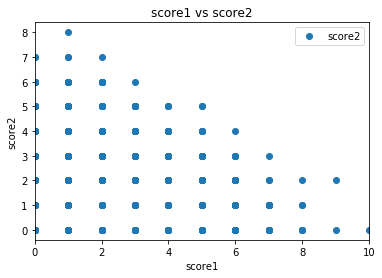

In [7]:
spi_matches.plot(x='score1', y='score2', style='o')  
plt.title('score1 vs score2')  
plt.xlabel('score1')  
plt.ylabel('score2')  
plt.show()

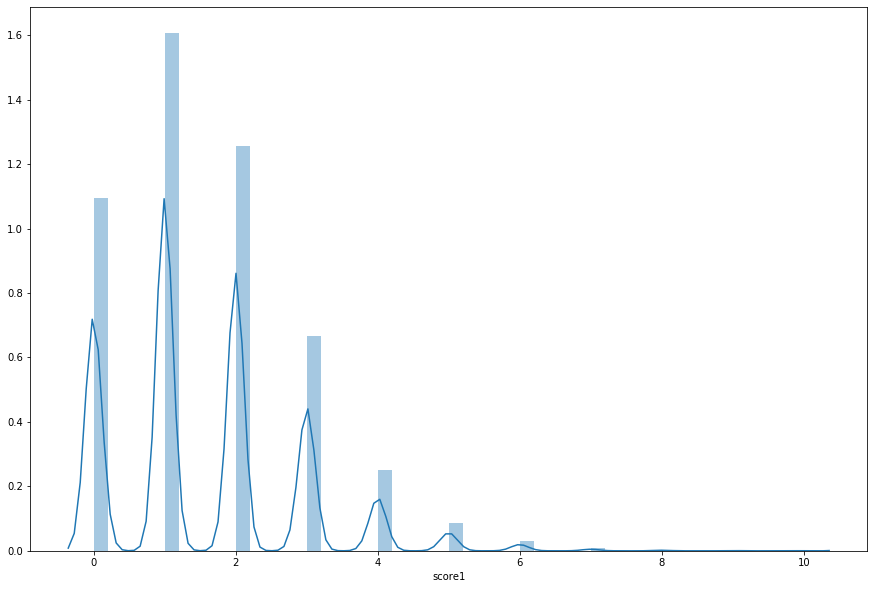

In [8]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(spi_matches['score1'])

In [9]:
spi_matches.shape

(12359, 22)

In [10]:
spi_matches.isnull().any()

date           False
league_id      False
league         False
team1          False
team2          False
spi1           False
spi2           False
prob1          False
prob2          False
probtie        False
proj_score1    False
proj_score2    False
importance1    False
importance2    False
score1         False
score2         False
xg1            False
xg2            False
nsxg1          False
nsxg2          False
adj_score1     False
adj_score2     False
dtype: bool

In [11]:
spi_matches = spi_matches.fillna(method='ffill')

In [12]:
spi_matches.isnull().any()

date           False
league_id      False
league         False
team1          False
team2          False
spi1           False
spi2           False
prob1          False
prob2          False
probtie        False
proj_score1    False
proj_score2    False
importance1    False
importance2    False
score1         False
score2         False
xg1            False
xg2            False
nsxg1          False
nsxg2          False
adj_score1     False
adj_score2     False
dtype: bool

In [13]:
X = spi_matches[['spi1', 'spi2', 'prob1', 'prob2', 'importance1', 'importance2']].values
y1 = spi_matches['score1'].values
y2 = spi_matches['score2'].values

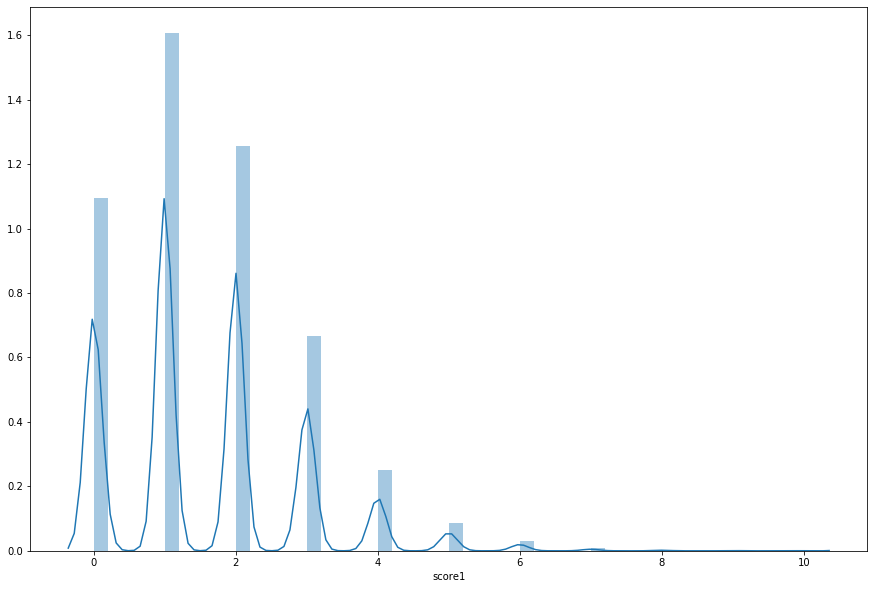

In [14]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(spi_matches['score1'])

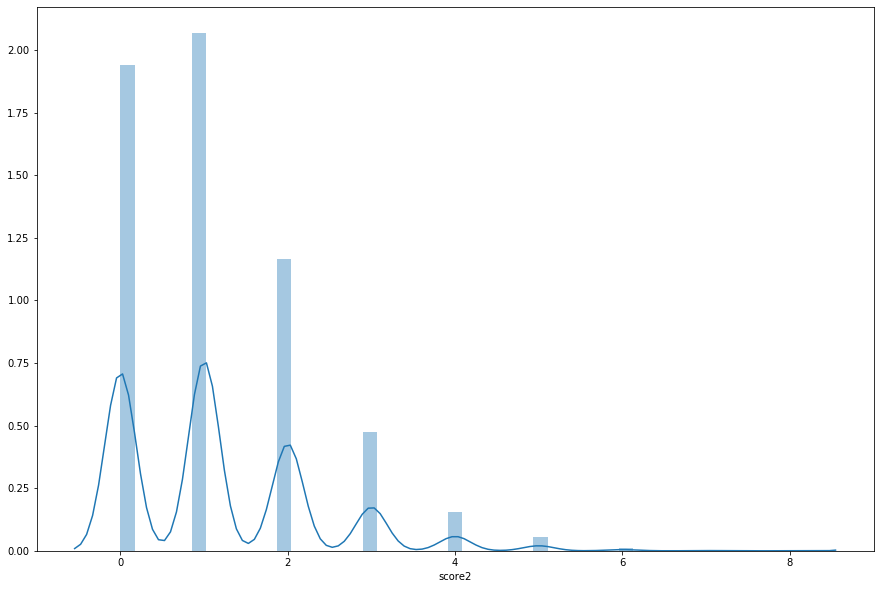

In [15]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(spi_matches['score2'])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=0)

In [17]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [19]:
y_pred = regressor.predict(X_test)

In [26]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(100)
df1

,Actual,Predicted
0,2.0,2.370094
1,4.0,2.902621
2,0.0,1.417197
3,2.0,2.780808
4,3.0,1.663631
...,...,...
95,1.0,1.452582
96,2.0,1.725265
97,0.0,1.164999
98,2.0,1.380297


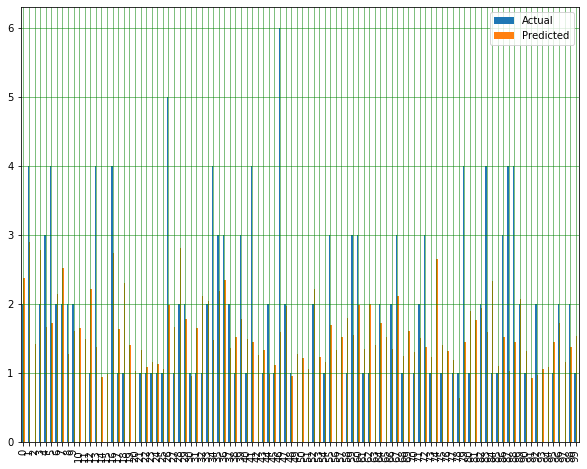

In [27]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.930146227224767
Mean Squared Error: 1.3646907583898376
Root Mean Squared Error: 1.1681997938665447
